# Problem set 4


John Adeleke

Wealth and Maternal Health Utilization in Nigeria
03/15/2024

In [1]:
set maxvar 120000
use /Users/johnadeleke/Desktop/Stats2/soc211_assignment/NGIR7BDT/NGIR7BFL.DTA, clear
use v013 v106 v025 v190 v417 v481 using "NGIR7BDT/NGIR7BFL.DTA", clear
eststo clear

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.

In [12]:
%set graph_height = 8

graph size was (8, 11), is now (8, 8).


In [13]:
%set graph_width = 11

graph size was (8, 8), is now (11, 8).


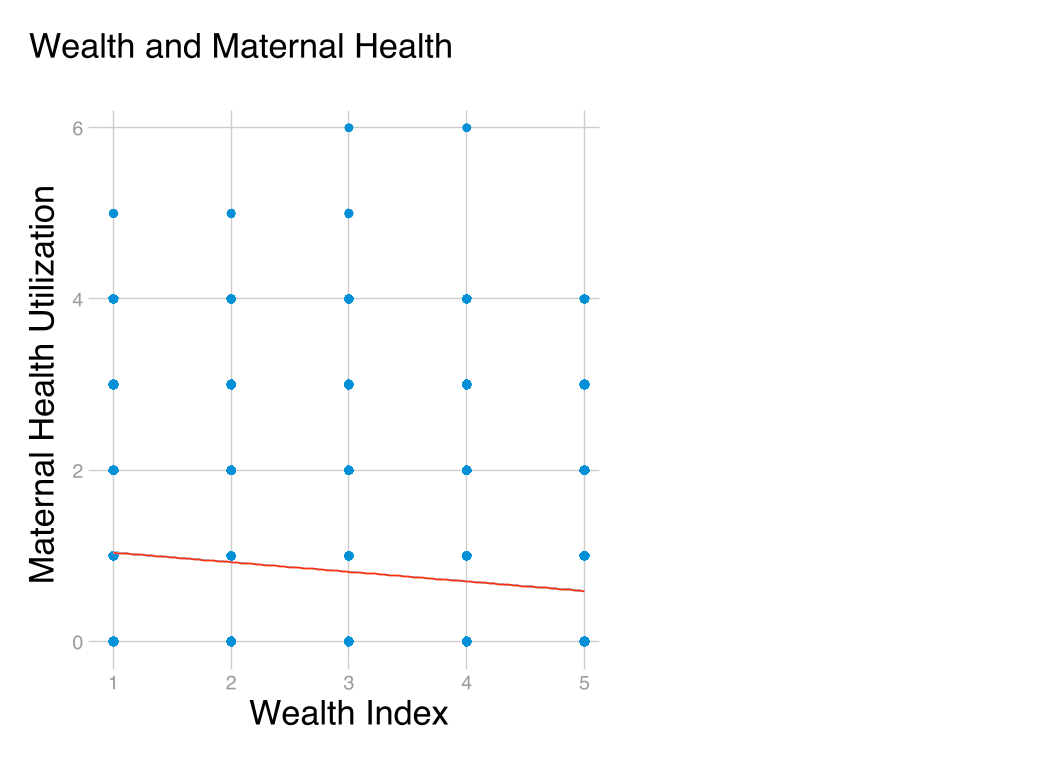

In [16]:
tw (scatter v417 v190) ///
(lfitci v417 v190), ///
ytitle(Maternal Health Utilization, size(large)) ///
xtitle(Wealth Index,size(large)) legend(off) scheme(538w) ///
title("Wealth and Maternal Health" " ", span size(large)) ///
aspect(1, place(west))

In [17]:
codebook v417 v190


-------------------------------------------------------------------------------
v417                             entries in pregnancy and postnatal care roster
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [0,6]                         Units: 1
         Unique values: 7                         Missing .: 0/41,821

            Tabulation: Freq.  Value
                       20,029  0
                       11,363  1
                        8,852  2
                        1,461  3
                          108  4
                            6  5
                            2  6

-------------------------------------------------------------------------------
v190                                                      wealth index combined
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: V190

     

C. From my output, we can see that there is no variability of entries in pregnancy and post-natal care roster across the various categories of wealth index. The scatter appears relatively constant. There appears to be no heteroscedasticity happening. 

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [18]:
quietly reg v417 v190
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of v417

H0: Constant variance

    chi2(1) = 116.24
Prob > chi2 = 0.0000


Since the p-value of 0.0000 is less than 0.05, I am rejecting the null hypothesis of constant variance. This suggest that there is statistically significant evidence of heteroscedasticity in my model.

## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [19]:
eststo: quietly reg v417 v190

(est1 stored)


In [20]:
eststo: quietly bootstrap _b[v190], rep(1000) nodots : ///
    reg v417 v190

(est2 stored)


In [21]:
esttab, ///
mlabels("OLS" "Bootstrap") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


--------------------------------------------
                      (1)             (2)   
                      OLS       Bootstrap   
--------------------------------------------
v190                -0.11***                
                   (0.00)                   
_bs_1                               -0.11***
                                   (0.00)   
_cons                1.15***                
                   (0.01)                   
--------------------------------------------
N                   41821           41821   
--------------------------------------------


Since there is no change in the standard error, this indicates that OLS is already robust on its own. My original standard errors already provide a good estimate of the variablity in my data, and the bootstrap sample that was generated is very similar to the original sample.

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [22]:
eststo: quietly reg v417 v190, robust

(est3 stored)


In [23]:
esttab, ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap          Robust   
------------------------------------------------------------
v190                -0.11***                        -0.11***
                   (0.00)                          (0.00)   
_bs_1                               -0.11***                
                                   (0.00)                   
_cons                1.15***                         1.15***
                   (0.01)                          (0.01)   
------------------------------------------------------------
N                   41821           41821           41821   
------------------------------------------------------------


There is no change in standard errors between my OG model and robust model. Therefore, the OLS method may actually be a good fit for the data, and the effect of any heteroscedasticity (if it's there) might be minor enough not to significantly affect the standard errors.

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

I would not do cluster robust standard errors because there are very few clusters. These few clusters for wealth index are poorest, poorer, middle, richer, richest. 

[code here]